# Feelings Analyzer (1st part)

## 1st Class - Textual Data

> Date: June 01 (2020)

- **Abstract:** This is the first class of the course of natural language, by [Alura](https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento). We are going to use NPL to classify and interpret what some things related to natural language mean.

- We are going to create a sentiment analyzer using a data base of the IMDb automaticcally translated to pt-BR. This dataset can be found in [Kaggle](https://www.kaggle.com/luisfredgs/imdb-ptbr/data)

- To to this, we need to convert our dataset to something that the computer can interprete and analyze. 


In [136]:
import pandas as pd
import numpy as np

SEED = 15
np.random.RandomState(seed = SEED)
review = pd.read_csv('imdb-reviews-pt-br.csv')
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(review.text_en, review.sentiment, random_state = SEED)
x_train

28119    From the start, you know this is a Sam Sherman...
9360     When i saw the first octopus movie it was a la...
24330    I saw Five Fingers at the Drive-In in...what, ...
5982     Interesting concept that just doesnt make it. ...
4932     The clever marketeer is he is, Jess Franco nat...
                               ...                        
39296    I have never seen a show as good as Full House...
49015    yes i have a copy of it on VHS uncut in great ...
2693     Theres nothing to say except I want my time ba...
8076     About your terrible movie copying Beethoven. A...
7624     I watched the Halloween episode...oh my god I ...
Name: text_en, Length: 37094, dtype: object

In [138]:
# Now we need to convert our data to something that the computer can understand
# 0 - bad    1 - good

review["classification"] = review.sentiment.replace(["neg", "pos"], [0, 1])
print(review["classification"])

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: classification, Length: 49459, dtype: int64


In [139]:
# Verifying if the data is balanced (there are around the same quantity of 0 and 1)
review.classification.value_counts()
# In this case, we have 50% of zeros and 50% of ones, approximately. 
# That means that we don't need to worry with problems of inbalanced data

0    24765
1    24694
Name: classification, dtype: int64

## 2nd Class - Bag of words

> Date: June 03 (2020)

- **Definition of Natural language processing:** A sub-area of the artificial intelligence trying to understand the human language and machine learning. The question is: how the computer can process and analyze the human language.

- Now we are going to represent the text in a form that the machine learning model can process.
- Corpus textual - A set of all text documents that make up the context
- Vocabulary - All words into the corpus textual, without repeat anyone.
    - Example: 
    
##### Corpus textual
                This movie is very good
                This movie is very bad
                This movie is very very good
                This movie is terrible
                
##### Number of times each word appears (Bag of words)
    
|       Phrase               | The | movie | is | very |good | bad | terrible |
|:--------------------------:|:---:|:-----:|:--:|:----:|:---:|:---:|:--------:|
|     The movie is good      |  1  |   1   |  1 |   1  |  1  |  0  |    0     |
|      The movie is bad      |  1  |   1   |  1 |   1  |  0  |  1  |    0     |
|This movie is very very good|  1  |   1   |  1 |   2  |  1  |  0  |    0     |
|   This movie is terrible   |  1  |   1   |  1 |   0  |  0  |  0  |    1     |

> This method is good to verify how the words and the number of repetitions can influnce in what someone wants to say

## Example of how to construct a Bag of words

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus textual
text = ["This is a bad movie", "This is a good movie"] 

vectorize = CountVectorizer(lowercase = False)
bag_of_words = vectorize.fit_transform(text)

In [141]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorize.get_feature_names())
print(sparse_matrix)

   This  bad  good  is  movie
0     1    1     0   1      1
1     1    0     1   1      1


## Trying with a real data

In [142]:
vectorize = CountVectorizer(lowercase = False, max_features = 400)
bag_of_words = vectorize.fit_transform(review.text_en) # Or text_pt, if you want
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorize.get_feature_names())
# print(sparse_matrix)

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, review.classification, random_state = SEED)
log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 200)
log_reg.fit(x_train, y_train)
accuracy = log_reg.score(x_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

# The Accuracy was increased raising the maximum quantity of features (before and into the class was used 50. Now, I'm using 400 words)

Accuracy: 81.63%


In [144]:
def text_classifier(text, text_column, classification_column):
    vectorize = CountVectorizer(lowercase = False, max_features = 400)
    bag_of_words = vectorize.fit_transform(text[text_column])
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, text[classification_column], random_state = SEED)
    log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 200)
    log_reg.fit(x_train, y_train)
    accuracy = log_reg.score(x_test, y_test) * 100
    return accuracy


print("Accuracy: %.2f%%" % text_classifier(review, "text_en", "classification"))

Accuracy: 81.63%


## 3rd Class - Word Cloud

> Date: June 05 (2020)

- **Abstract:** In this step I'm making a word cloud of the project.

### What is a Word cloud?

- Is a method to visualize the words where the most common are greater and the others are shorter.
- The library used here is WordCloud. [GitHub](https://github.com/amueller/word_cloud) and [documentation](https://amueller.github.io/word_cloud/) available and all that we need to use the it is there (examples, functions, figures etc)

> Obs.: You need to install the library first and then you'll be able to run this code

- **Example (from the cited source):**

![Word Cloud with customized colours](https://amueller.github.io/word_cloud/_images/sphx_glr_a_new_hope_001.png)

In [145]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join(text for text in review.text_en)
word_cloud = WordCloud(width = 800, height = 500, 
                      max_font_size = 110,
                      collocations = False,
                      contour_color = "black",
                      contour_width = 2,
                      background_color = "white").generate(all_words)

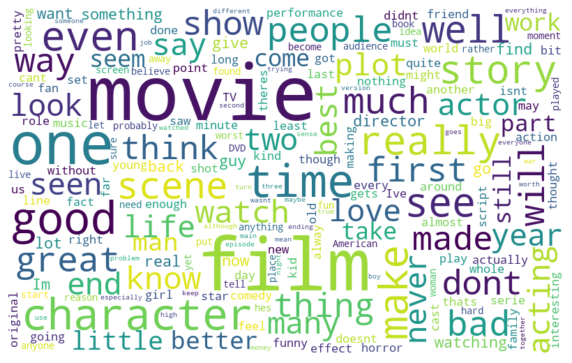

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.imshow(word_cloud,
          interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [178]:
def generate_word_cloud(text, text_column, classification_column, target_result = None, color_map = "viridis"):
    if(target_result != None):
        filtered_text = text[text[classification_column] == target_result]
    else:
        filtered_text = text
    all_words = ' '.join(text for text in filtered_text[text_column])
    word_cloud = WordCloud(width = 800, height = 500, 
                          max_font_size = 110,
                          collocations = False,
                          background_color = "whitesmoke",
                          colormap = color_map).generate(all_words)
    
    plt.figure(figsize = (10, 8))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
#     return all_words

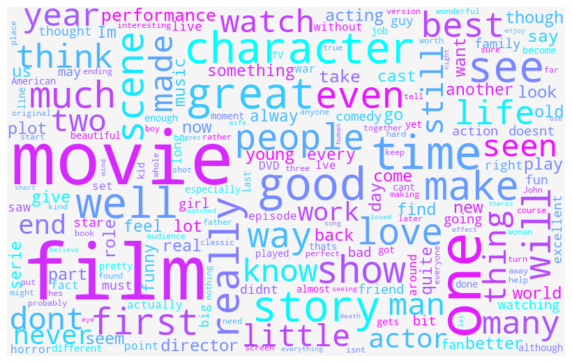

In [148]:
# Show positive comments
generate_word_cloud(review, "text_en", "classification", 1, color_map = "cool")

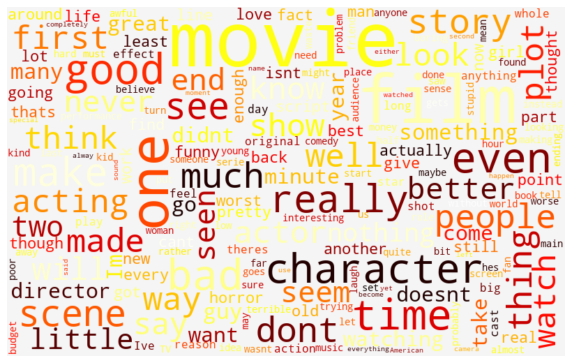

In [149]:
# Show negative comments
generate_word_cloud(review, "text_en", "classification", 0, color_map = "hot")

## 4rd Class - NLTK

> Date: June 08 (2020)

- NLTK: Natural Language Toolkit 

> Obs.: You need to install the library. Use pip to install then run the cell below (uncomment before) to download everything that you need to use the library.

- We're going to use this library to see what words appear more frequently (the 10, 20 or 50 most common, for example)


In [150]:
# import nltk

# nltk.download("all")

### Example

In [151]:
import nltk

text = ['This movie is bad', 'This movie is good']
nltk.FreqDist(text)

FreqDist({'This movie is bad': 1, 'This movie is good': 1})

 - With this we can note that it's showing the frequency of the phrases, not the words. To change it:

### Tokenization

Process to separate the words. Here we'll to that by the white spaces

#### Example

In [152]:
from nltk import tokenize

phrase = "I hated this film"
space_token = tokenize.WhitespaceTokenizer()
word_token = space_token.tokenize(phrase)
print(word_token)

['I', 'hated', 'this', 'film']


#### Applying in the project

In [153]:
space_token = tokenize.WhitespaceTokenizer()
word_token = space_token.tokenize(all_words)
words_frequency = nltk.FreqDist(word_token)

In [154]:
words_frequency

FreqDist({'the': 541903, 'a': 294097, 'and': 290407, 'of': 269316, 'to': 248555, 'is': 194182, 'in': 162011, 'I': 131434, 'that': 120419, 'this': 110592, ...})

In [155]:
df_words_frequency = pd.DataFrame({"Words": list(words_frequency.keys()), 
            "Frequency": list(words_frequency.values())}).nlargest(columns = "Frequency", n = 20)
df_words_frequency

,Words,Frequency
16,the,541903
7,a,294097
41,and,290407
21,of,269316
87,to,248555
59,is,194182
39,in,162011
27,I,131434
154,that,120419
99,this,110592


## 5th Class - Visualizing with sns.barplot (Pareto Chart)

> Date: June 08 (2020)

- sns: Library based on Matplotlib (one level higher), made to visualize data using python

- We're going to use this library to see what words appear more frequently in a more beauty and presentable form 


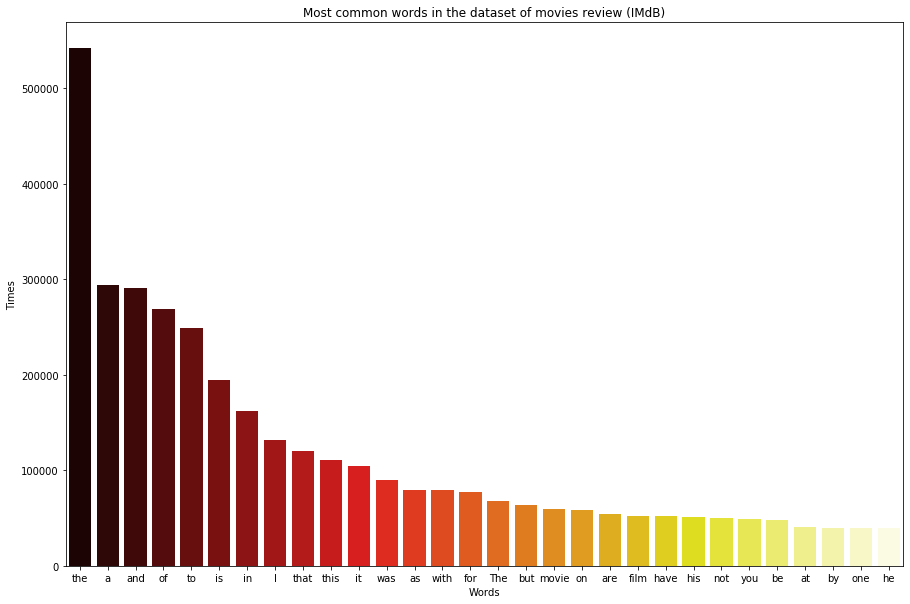

In [156]:
import seaborn as sns

def pareto_chart_plot(text_column, n_words, color_map = "viridis"):
    all_words = ' '.join(text for text in text_column)
    space_token = tokenize.WhitespaceTokenizer()
    word_token = space_token.tokenize(all_words)
    words_frequency = nltk.FreqDist(word_token)
    df_words_frequency = pd.DataFrame({"Words": list(words_frequency.keys()), 
            "Frequency": list(words_frequency.values())}).nlargest(columns = "Frequency", n = n_words)

    plt.figure(figsize = (15, 10))
    ax = sns.barplot(data = df_words_frequency, 
                     x = "Words", y = "Frequency", 
                    palette = color_map)
    ax.set(ylabel = "Times", 
          xlabel  = "Words", 
          title   = "Most common words in the dataset of movies review (IMdB)")

    
pareto_chart_plot(review.text_en, 30, color_map = "hot")

### Stop Words - Ignoring useless words

In [157]:
# import nltk
# nltk.download('stopwords')

In [188]:
from nltk.corpus import stopwords

def remove_words(original_column_text, useless_words, token_type, lowercase = False):
    processed_reviews = list()
    for strings in original_column_text:
        if (lowercase):
            strings = strings.lower()
        token = token_type.tokenize(strings)
        new_review = list()
        for word in token:
            if word not in useless_words:
                new_review.append(word)
        processed_reviews.append(' '.join(new_review))
    return processed_reviews
stop_words = nltk.corpus.stopwords.words('english')
processed_reviews = remove_words(review.text_en, stop_words, tokenize.WhitespaceTokenizer())

In [159]:
review["processed_text"] = processed_reviews
review.head()

,id,text_en,text_pt,sentiment,classification,processed_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Once Mr. Costner dragged movie far longer nece...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,This example majority action films same. Gener...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"First I hate moronic rappers, couldnt act gun ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Not even Beatles could write songs everyone li...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Brass pictures movies fitting word really some...


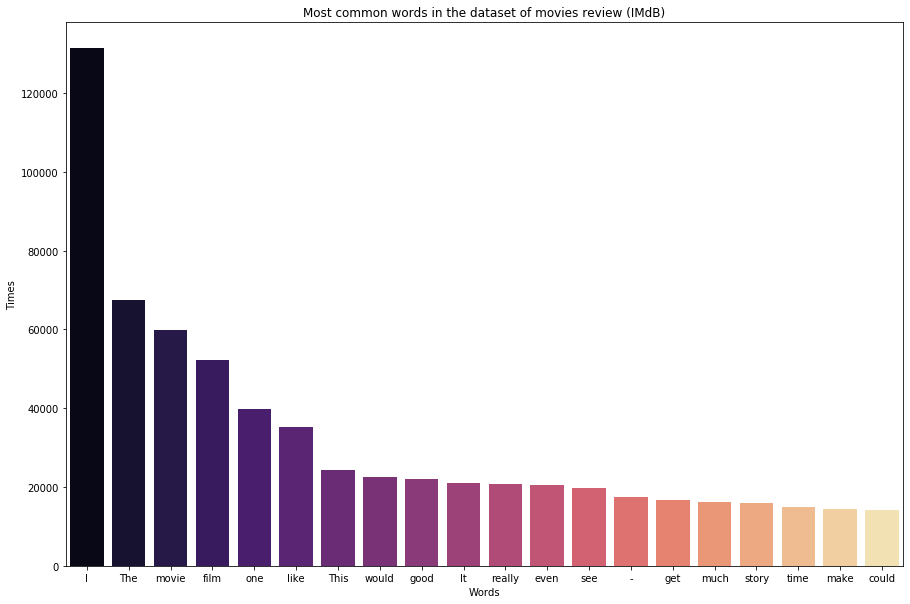

In [160]:
pareto_chart_plot(review.processed_text, 20, color_map = "magma")

In [161]:
print("Accuracy: %.2f%%" % text_classifier(review, "processed_text", "classification"))

Accuracy: 82.11%


> Here we can see a little improvement between the accuracy of the results with all the words and without the called **stop words**

# Feelings Analyzer (2nd part)

## Natural Languague - Part 2

### 1st Class - Tokenization by punctuation
**Abstract:** Now we'll do the process of tokenization using punctuation to separate the words. Using that, we can avoid that 'World!' and 'World.' be considered different words

In [162]:
from nltk import tokenize

text = "Hello World!"
pointing_token = tokenize.WordPunctTokenizer()
tokenized_words = pointing_token.tokenize(text)
print(tokenized_words)

['Hello', 'World', '!']


In [163]:
punctuation_char = list()
for palavra in punctuation:
    punctuation_char.append(palavra)
print(punctuation_char)
processed_reviews_2 = remove_words(processed_reviews, punctuation_char + stop_words, pointing_token)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [164]:
review["double_processed_text"] = processed_reviews_2
review.head()

,id,text_en,text_pt,sentiment,classification,processed_text,double_processed_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,This example majority action films same. Gener...,This example majority action films Generic bor...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...


In [165]:
processed_reviews_2[1] # Working =D

'This example majority action films Generic boring theres really nothing worth watching A complete waste barely tapped talents Ice T Ice Cube whove proven many times capable acting acting well Dont bother one go see New Jack City Ricochet watch New York Undercover Ice T Boyz n Hood Higher Learning Friday Ice Cube see real deal Ice Ts horribly cliched dialogue alone makes film grate teeth Im still wondering heck Bill Paxton film And heck always play exact character From Aliens onward every film Ive seen Bill Paxton playing exact irritating character least Aliens character died made somewhat gratifying ... Overall second rate action trash There countless better films see really want see one watch Judgement Night practically carbon copy better acting better script The thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite 4 10'

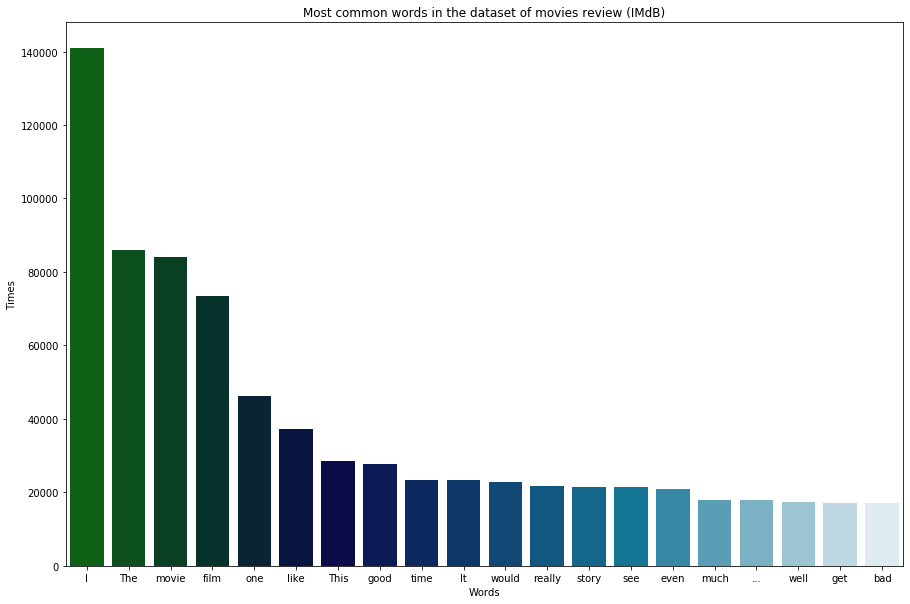

In [166]:
pareto_chart_plot(review.double_processed_text, 20, color_map = "ocean")

### 2nd Class - Tokenization by accents
**Abstract:** Now we'll do the process of tokenization using accents to separate the words. This step is only necessary to use if you're using the text in portuguese (brazilian/pt-BR)

In [195]:
# If you are using pt-BR, do that step to remove accents of the text

import unidecode

# This is an tool to use with portuguese (Brazil)
text_without_accents = [unidecode.unidecode(text) for text in review.text_pt]
stop_words_without_accent = [unidecode.unidecode(text) for text in nltk.corpus.stopwords.words('portuguese')]
pt_processed = remove_words(text_without_accents, stop_words_without_accent, space_token)


In [196]:
text_without_accents[0] # Working ;D

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessario. Alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. A maioria de nos tem fantasmas no armario, e o personagem Costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. O personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, Ashton Kutcher. O problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. Seu unico obstaculo parece estar vencendo Costner. Finalmente, quando estamos bem alem do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. Nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

In [197]:
review["pt_processed"] = pt_processed
review.head()

,text_en,text_pt,classification,pt_processed,final_text
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",mr costner dragged movie far longer necessary ...
1,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes acao mesmos...,example majority action films generic boring t...
2,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",first hate moronic rappers couldnt act gun pre...
3,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever musicas todos gos...,even beatles could write songs everyone liked ...
4,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latao palavra apropriada eles, ve...",brass pictures movies fitting word really some...


In [ ]:
# Organizing our dataframe
review = review.drop(columns = ["sentiment", "id", "processed_text", "double_processed_text"])



In [218]:
review["final_text"] = processed_reviews_2 # Really? 
review.head()

,text_en,text_pt,classification,pt_processed,final_text
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Once Mr Costner dragged movie far longer neces...
1,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes acao mesmos...,This example majority action films Generic bor...
2,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",First I hate moronic rappers couldnt act gun p...
3,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever musicas todos gos...,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latao palavra apropriada eles, ve...",Brass pictures movies fitting word really some...


In [214]:
print("Accuracy: %.4f%%" % text_classifier(review, "final_text", "classification"))

Accuracy: 82.1674%


> Here we can see a tiny improvement in the accuracy of our classification

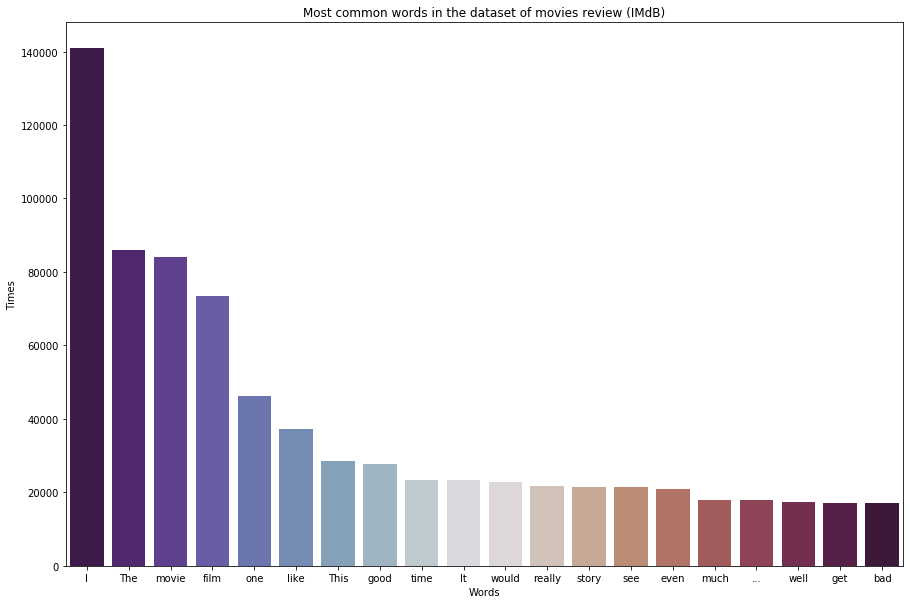

In [219]:
pareto_chart_plot(review.final_text, 20, color_map = "twilight_shifted")

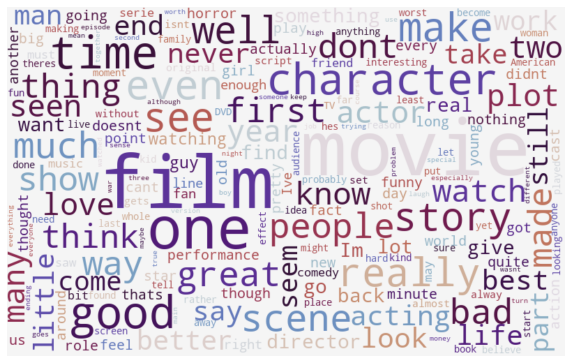

In [220]:
generate_word_cloud(review, "final_text", "classification", color_map = "twilight_shifted")

### 3rd Class - Tokenization by lowercase
**Abstract:** During all the process, we could see that there are a lot of words that weren't considered because the first letter be uppercase. Now we'll put all words in lowercase.

In [204]:
lower_reviews = remove_words(processed_reviews, punctuation_char + stop_words, pointing_token, lowercase = True)

In [216]:
review["final_text"] = lower_reviews 

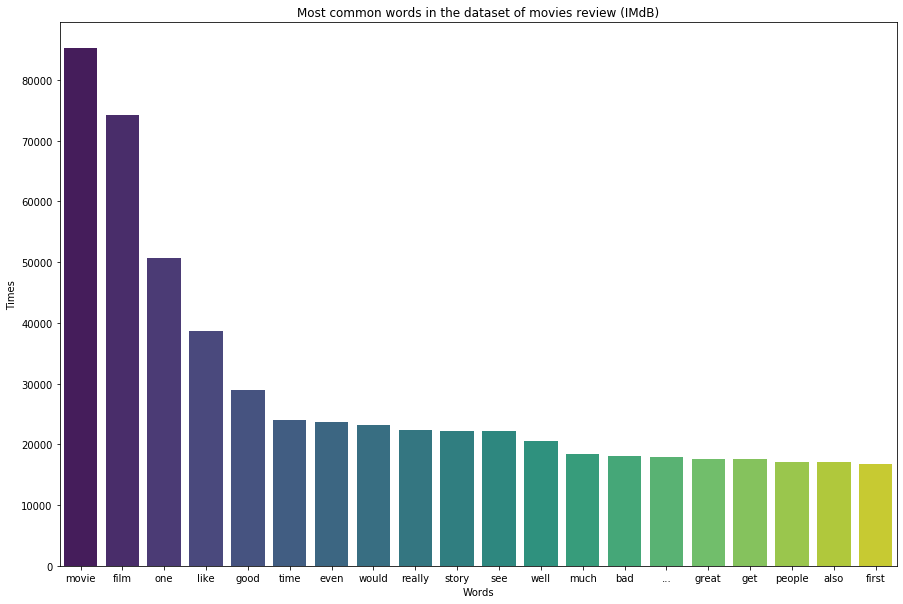

In [206]:
pareto_chart_plot(review.final_text, 20)

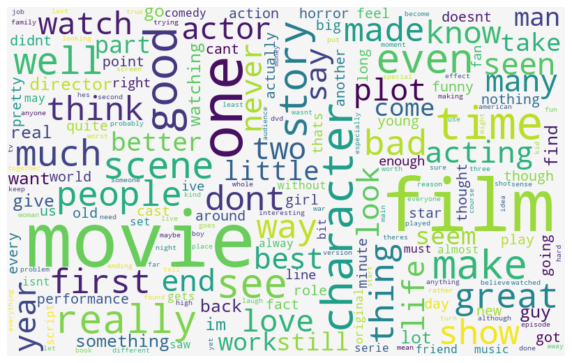

In [207]:
generate_word_cloud(review, "final_text", "classification")

In [208]:
review.final_text[0]

'mr costner dragged movie far longer necessary aside terrific sea rescue sequences care characters us ghosts closet costners character realized early forgotten much later time care character really care cocky overconfident ashton kutcher problem comes kid thinks hes better anyone else around shows signs cluttered closet obstacle appears winning costner finally well past half way point stinker costner tells us kutchers ghosts told kutcher driven best prior inkling foreshadowing magic could keep turning hour'

In [209]:
review.text_en[0]

'Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costners character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutchers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.'

In [217]:
print("Accuracy: %.4f%%" % text_classifier(review, "final_text", "classification"))

Accuracy: 83.4129%
